#Face-Recognition

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import files
import os

In [0]:
from fastai.vision import *

##Getting the data

In [5]:
! {sys.executable} -m pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [6]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
os.listdir()

['.config', 'kaggle.json', 'sample_data']

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [9]:
path = Config.data_path()/'celeba-dataset'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/celeba-dataset')

In [0]:
#os.listdir('/root/.kaggle/')
! chmod 600 /root/.kaggle/kaggle.json

In [0]:
#!kaggle datasets download jessicali9530/celeba-dataset -f list_attr_celeba.csv -p {path}
#!kaggle datasets download jessicali9530/celeba-dataset  img_align_celeba -p {path}

In [17]:
!kaggle datasets download --force jessicali9530/celeba-dataset -p {path}

100% 1.33G/1.33G [00:17<00:00, 89.2MB/s]
100% 1.33G/1.33G [00:17<00:00, 81.4MB/s]


In [18]:
!ls -la /root/.fastai/data/

total 12
drwxr-xr-x 3 root root 4096 Oct 13 01:28 .
drwxr-xr-x 3 root root 4096 Oct 13 01:27 ..
drwxr-xr-x 2 root root 4096 Oct 13 01:28 celeba-dataset


In [0]:
#!rm -R /root/.fastai/data/celeba-dataset

In [0]:
! unzip -q -n {path}/celeba-dataset.zip -d {path}

In [20]:
!ls -la /root/.fastai/data/celeba-dataset

total 1436376
drwxr-xr-x 3 root root       4096 Oct 13 01:29 .
drwxr-xr-x 3 root root       4096 Oct 13 01:28 ..
-rw-r--r-- 1 root root 1427750792 Oct 13 01:28 celeba-dataset.zip
drwxr-xr-x 3 root root       4096 Oct 13 01:29 img_align_celeba
-rw-r--r-- 1 root root   24913339 Oct  1 08:52 list_attr_celeba.csv
-rw-r--r-- 1 root root    5390926 Oct  1 08:52 list_bbox_celeba.csv
-rw-r--r-- 1 root root    2836404 Oct  1 08:52 list_eval_partition.csv
-rw-r--r-- 1 root root    9932092 Oct  1 08:52 list_landmarks_align_celeba.csv


In [0]:
#!rm /root/.fastai/data/celeba-dataset/list_attr_celeba.csv

##Transofrm CSV

In [21]:
df = pd.read_csv(path/'list_attr_celeba.csv')
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [0]:
import csv

In [0]:
def filtro(trait, cond):
  if cond == '1':
    x = trait + ' '
  else:
    x = ''
  return x

In [24]:
df.head(1)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1


In [25]:
atributosCSV = []
with open(path/'list_attr_celeba.csv', newline='') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
    #print(row['5_o_Clock_Shadow'], row['Bald'], row['Bangs'], row['Straight_Hair'], row['Wavy_Hair'], row['Black_Hair'], row['Blond_Hair'], row['Brown_Hair'], row['Gray_Hair'], row['No_Beard'], row['Mustache'], row['Male'], row['Pale_Skin'])
    linea = filtro('Arched_Eyebrows', row['Arched_Eyebrows'])
    #print(row['image_id'] + ' -> ' + linea + ' || ' + row['Arched_Eyebrows'])
    id = 'img' + row['image_id']
    atributosCSV.append(id + ',' +
                filtro('5_o_Clock_Shadow', row['5_o_Clock_Shadow']) +
                filtro('Arched_Eyebrows', row['Arched_Eyebrows']) +
                filtro('Attractive', row['Attractive']) +
                filtro('Bags_Under_Eyes', row['Bags_Under_Eyes']) +
                filtro('Bald', row['Bald']) + 
                filtro('Bangs', row['Bangs']) +     
                filtro('Big_Lips', row['Big_Lips']) +
                filtro('Big_Nose', row['Big_Nose']) +
                filtro('Black_Hair', row['Black_Hair']) +
                filtro('Blond_Hair', row['Blond_Hair']) +
                filtro('Blurry', row['Blurry']) +        
                filtro('Brown_Hair', row['Brown_Hair']) +            
                filtro('Bushy_Eyebrows', row['Bushy_Eyebrows']) + 
                filtro('Chubby', row['Chubby']) +        
                filtro('Double_Chin', row['Double_Chin']) +        
                filtro('Eyeglasses', row['Eyeglasses']) +        
                filtro('Goatee', row['Goatee']) +
                filtro('Gray_Hair', row['Gray_Hair']) +        
                filtro('Heavy_Makeup', row['Heavy_Makeup']) +        
                filtro('High_Cheekbones', row['High_Cheekbones']) +
                filtro('Male', row['Male']) +
                filtro('Mouth_Slightly_Open', row['Mouth_Slightly_Open']) + 
                filtro('Mustache', row['Mustache']) +        
                filtro('Narrow_Eyes', row['Narrow_Eyes']) +
                filtro('No_Beard', row['No_Beard']) +
                filtro('Oval_Face', row['Oval_Face']) +
                filtro('Pale_Skin', row['Pale_Skin']) +
                filtro('Pointy_Nose', row['Pointy_Nose']) + 
                filtro('Receding_Hairline', row['Receding_Hairline']) +
                filtro('Rosy_Cheeks', row['Rosy_Cheeks']) +
                filtro('Sideburns', row['Sideburns']) +
                filtro('Smiling', row['Smiling']) +
                filtro('Straight_Hair', row['Straight_Hair']) +
                filtro('Wavy_Hair', row['Wavy_Hair']) +
                filtro('Wearing_Earrings', row['Wearing_Earrings']) +
                filtro('Wearing_Hat', row['Wearing_Hat']) +
                filtro('Wearing_Lipstick', row['Wearing_Lipstick']) +
                filtro('Wearing_Necklace', row['Wearing_Necklace']) +
                filtro('Wearing_Necktie', row['Wearing_Necktie']) +
                filtro('Young', row['Young']))
atributosCSV

['img000001.jpg,Arched_Eyebrows Attractive Brown_Hair Heavy_Makeup High_Cheekbones Mouth_Slightly_Open No_Beard Pointy_Nose Smiling Straight_Hair Wearing_Earrings Wearing_Lipstick Young ',
 'img000002.jpg,Bags_Under_Eyes Big_Nose Brown_Hair High_Cheekbones Mouth_Slightly_Open No_Beard Smiling Young ',
 'img000003.jpg,Big_Lips Blurry Male Narrow_Eyes No_Beard Pointy_Nose Wavy_Hair Young ',
 'img000004.jpg,Attractive No_Beard Pointy_Nose Straight_Hair Wearing_Earrings Wearing_Lipstick Wearing_Necklace Young ',
 'img000005.jpg,Arched_Eyebrows Attractive Big_Lips Heavy_Makeup Narrow_Eyes No_Beard Pointy_Nose Wearing_Lipstick Young ',
 'img000006.jpg,Arched_Eyebrows Attractive Big_Lips Brown_Hair Heavy_Makeup Mouth_Slightly_Open No_Beard Wavy_Hair Wearing_Earrings Wearing_Lipstick Young ',
 'img000007.jpg,5_o_Clock_Shadow Attractive Bags_Under_Eyes Big_Lips Big_Nose Black_Hair Bushy_Eyebrows Male No_Beard Pointy_Nose Straight_Hair Young ',
 'img000008.jpg,5_o_Clock_Shadow Arched_Eyebrows Ba

In [0]:
with open('atributos.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    
    writer.writerow(['image_id', 'tags'])
    for i in range(len(atributosCSV)):
      linea = atributosCSV[i]
      writer.writerow([linea[:9], linea[14:-1]])

In [0]:
!mv atributos.csv /root/.fastai/data/celeba-dataset

In [29]:
!ls -la /root/.fastai/data/celeba-dataset

total 1459196
drwxr-xr-x 3 root root       4096 Oct 13 01:35 .
drwxr-xr-x 3 root root       4096 Oct 13 01:28 ..
-rw-r--r-- 1 root root   23365444 Oct 13 01:33 atributos.csv
-rw-r--r-- 1 root root 1427750792 Oct 13 01:28 celeba-dataset.zip
drwxr-xr-x 3 root root       4096 Oct 13 01:29 img_align_celeba
-rw-r--r-- 1 root root   24913339 Oct  1 08:52 list_attr_celeba.csv
-rw-r--r-- 1 root root    5390926 Oct  1 08:52 list_bbox_celeba.csv
-rw-r--r-- 1 root root    2836404 Oct  1 08:52 list_eval_partition.csv
-rw-r--r-- 1 root root    9932092 Oct  1 08:52 list_landmarks_align_celeba.csv


In [0]:
import os
for filename in os.listdir('/root/.fastai/data/celeba-dataset/img_align_celeba/img_align_celeba'):
    newName = 'img'+filename
    #print(filename)
    old_file = os.path.join("/root/.fastai/data/celeba-dataset/img_align_celeba/img_align_celeba", filename)
    new_file = os.path.join("/root/.fastai/data/celeba-dataset/img_align_celeba/img_align_celeba", newName)
    os.rename(old_file, new_file)


In [0]:
!ls -la /root/.fastai/data/celeba-dataset/img_align_celeba/img_align_celeba

##Multiclassification

In [34]:
df = pd.read_csv(path/'atributos.csv')
df.head()

,image_id,tags
0,img000001,Arched_Eyebrows Attractive Brown_Hair Heavy_Ma...
1,img000002,Bags_Under_Eyes Big_Nose Brown_Hair High_Cheek...
2,img000003,Big_Lips Blurry Male Narrow_Eyes No_Beard Poin...
3,img000004,Attractive No_Beard Pointy_Nose Straight_Hair ...
4,img000005,Arched_Eyebrows Attractive Big_Lips Heavy_Make...


In [35]:
df.tail()

,image_id,tags
202594,img202595,Attractive Big_Lips Blond_Hair No_Beard Wearin...
202595,img202596,Bangs Big_Lips Blond_Hair High_Cheekbones Male...
202596,img202597,Black_Hair Eyeglasses High_Cheekbones Male Mou...
202597,img202598,Arched_Eyebrows Attractive Big_Lips Black_Hair...
202598,img202599,Arched_Eyebrows Attractive Blond_Hair Heavy_Ma...


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
#cont_names = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald,Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry,Brown_Hair','Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair','Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'atributos.csv', folder='img_align_celeba/img_align_celeba', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


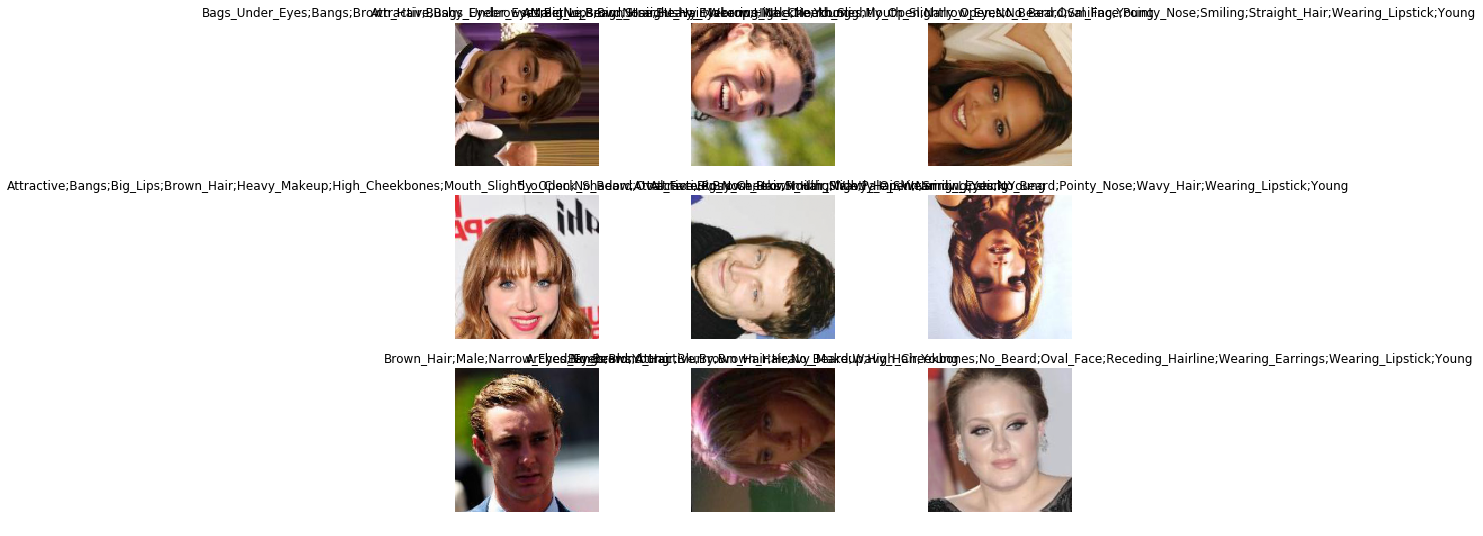

In [40]:
data.show_batch(rows=3, figsize=(12,9))

In [41]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['5_o_Clock_Shadow',
  'Arched_Eyebrows',
  'Attractive',
  'Bags_Under_Eyes',
  'Bald',
  'Bangs',
  'Big_Lips',
  'Big_Nose',
  'Black_Hair',
  'Blond_Hair',
  'Blurry',
  'Brown_Hair',
  'Bushy_Eyebrows',
  'Chubby',
  'Double_Chin',
  'Eyeglasses',
  'Goatee',
  'Gray_Hair',
  'Heavy_Makeup',
  'High_Cheekbones',
  'Male',
  'Mouth_Slightly_Open',
  'Mustache',
  'Narrow_Eyes',
  'No_Beard',
  'Oval_Face',
  'Pale_Skin',
  'Pointy_Nose',
  'Receding_Hairline',
  'Rosy_Cheeks',
  'Sideburns',
  'Smiling',
  'Straight_Hair',
  'Wavy_Hair',
  'Wearing_Earrings',
  'Wearing_Hat',
  'Wearing_Lipstick',
  'Wearing_Necklace',
  'Wearing_Necktie',
  'Young'],
 40,
 162080,
 40519)

###Training: resnet34

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


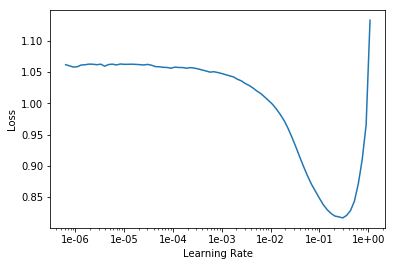

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.170123,0.156130,0.909412,0.721164,13:12


In [0]:
learn.save('stage-1-rn50')

In [0]:
###Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


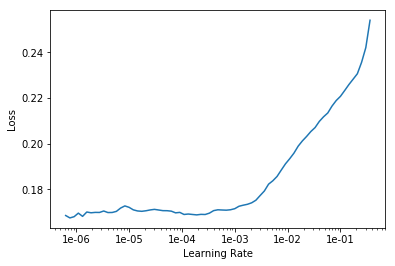

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, slice(1e-5, 0.01/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.144127,0.137098,0.923388,0.755230,15:12
1,0.133208,0.125878,0.924547,0.780921,14:34
2,0.127071,0.121269,0.928470,0.791477,15:07


In [0]:
learn.save('stage-2-rn50')

###Prediction

In [0]:
learn.export()

In [0]:
os.listdir(path)

['list_eval_partition.csv',
 'models',
 'celeba-dataset.zip',
 'list_attr_celeba.csv',
 'img_align_celeba',
 'list_bbox_celeba.csv',
 'list_landmarks_align_celeba.csv',
 'export.pkl',
 'atributos.csv']

In [0]:
!ls

export.pkl  sample_data


In [0]:
!cp /root/.fastai/data/celeba-dataset/export.pkl .

In [0]:
#learn.load('stage-1-50');
#learn.export()

In [0]:
img = open_image(path/'img_align_celeba/img_align_celeba/img000300.jpg')

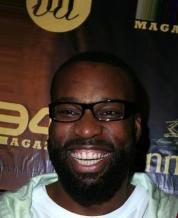

In [0]:
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

MultiCategory Male

In [0]:
pred_idx

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.])

In [0]:
outputs

tensor([1.3223e-03, 9.3414e-07, 8.1471e-02, 1.8743e-06, 3.5862e-04, 1.6769e-04,
        9.0665e-01, 3.3956e-01, 3.5267e-03, 1.2972e-04, 1.0788e-03, 4.5333e-04,
        1.6146e-07, 6.7980e-02, 2.6933e-02, 8.3361e-05, 4.7028e-01, 2.3933e-06,
        2.0861e-04, 1.6477e-04, 1.3043e-01, 1.4472e-01, 4.3517e-03, 6.9608e-03,
        2.5346e-03])

###Training: resnet50

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [43]:
learn = cnn_learner(data, models.resnet50, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 98.4MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


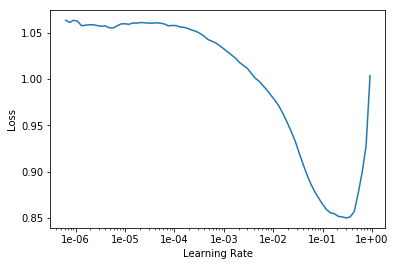

In [44]:
learn.lr_find()
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(4, slice(0.01))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.256342,0.239984,0.839107,0.798026,17:07
1,0.240434,0.222055,0.866482,0.811567,17:03
2,0.226581,0.211259,0.862144,0.823023,17:05
3,0.221784,0.208377,0.866816,0.825060,17:07


In [0]:
learn.save('stage-3-rn50')

In [50]:
!ls -la

total 100508
drwxr-xr-x 1 root root      4096 Oct 13 02:48 .
drwxr-xr-x 1 root root      4096 Oct 13 01:23 ..
drwxr-xr-x 1 root root      4096 Oct  8 20:06 .config
-rw-r--r-- 1 root root 102902044 Oct 13 02:48 export.pkl
drwxr-xr-x 1 root root      4096 Aug 27 16:17 sample_data


In [0]:
learn.export()

In [0]:
!cp /root/.fastai/data/celeba-dataset/export.pkl .

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


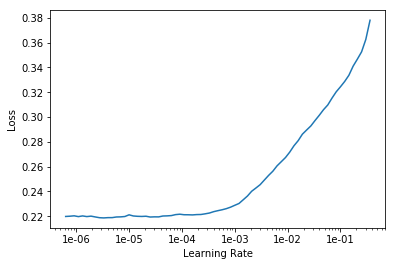

In [52]:
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(4, slice(1e-5, 0.01/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.221068,0.211157,0.873909,0.822236,22:18
1,0.210586,0.199490,0.879265,0.832849,22:19
2,0.203025,0.190335,0.879183,0.841915,22:16
3,0.201433,0.187909,0.883499,0.843402,22:22


In [0]:
learn.save('stage-4-rn50')

###Production resnet50

In [0]:
learn.export()

In [59]:
!ls -la /root/.fastai/data/celeba-dataset

total 1559692
drwxr-xr-x 4 root root       4096 Oct 13 02:48 .
drwxr-xr-x 3 root root       4096 Oct 13 01:28 ..
-rw-r--r-- 1 root root   23365444 Oct 13 01:33 atributos.csv
-rw-r--r-- 1 root root 1427750792 Oct 13 01:28 celeba-dataset.zip
-rw-r--r-- 1 root root  102902082 Oct 13 04:20 export.pkl
drwxr-xr-x 3 root root       4096 Oct 13 01:29 img_align_celeba
-rw-r--r-- 1 root root   24913339 Oct  1 08:52 list_attr_celeba.csv
-rw-r--r-- 1 root root    5390926 Oct  1 08:52 list_bbox_celeba.csv
-rw-r--r-- 1 root root    2836404 Oct  1 08:52 list_eval_partition.csv
-rw-r--r-- 1 root root    9932092 Oct  1 08:52 list_landmarks_align_celeba.csv
drwxr-xr-x 2 root root       4096 Oct 13 04:20 models


In [62]:
!ls -la

total 100508
drwxr-xr-x 1 root root      4096 Oct 13 02:48 .
drwxr-xr-x 1 root root      4096 Oct 13 01:23 ..
drwxr-xr-x 1 root root      4096 Oct  8 20:06 .config
-rw-r--r-- 1 root root 102902082 Oct 13 04:22 export.pkl
drwxr-xr-x 1 root root      4096 Aug 27 16:17 sample_data


In [0]:
!cp /root/.fastai/data/celeba-dataset/export.pkl .

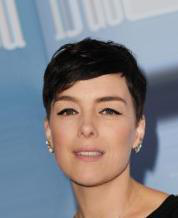

In [63]:
img = open_image(path/'img_align_celeba/img_align_celeba/img000280.jpg')
img

In [64]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

MultiCategory Attractive;Black_Hair;Heavy_Makeup;Mouth_Slightly_Open;Narrow_Eyes;No_Beard;Oval_Face;Smiling;Straight_Hair;Wearing_Earrings;Wearing_Lipstick;Young

In [65]:
pred_idx

tensor([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 0., 1.])

In [66]:
outputs

tensor([1.0882e-03, 4.6382e-01, 9.0709e-01, 4.4221e-03, 1.4568e-05, 8.1487e-02,
        1.2673e-01, 2.1269e-02, 9.6645e-01, 2.3128e-04, 4.7098e-04, 3.4096e-03,
        3.3690e-01, 2.0203e-03, 4.0548e-04, 2.1705e-04, 3.3506e-05, 3.6915e-05,
        8.9602e-01, 4.8102e-01, 3.2524e-02, 9.4644e-01, 4.4625e-05, 5.1335e-01,
        9.9957e-01, 5.3071e-01, 3.8090e-03, 2.6183e-01, 1.5650e-03, 3.2175e-02,
        4.6288e-05, 8.2657e-01, 5.6972e-01, 3.2052e-02, 8.4488e-01, 4.9994e-04,
        9.0565e-01, 8.0141e-02, 4.9855e-03, 9.8357e-01])

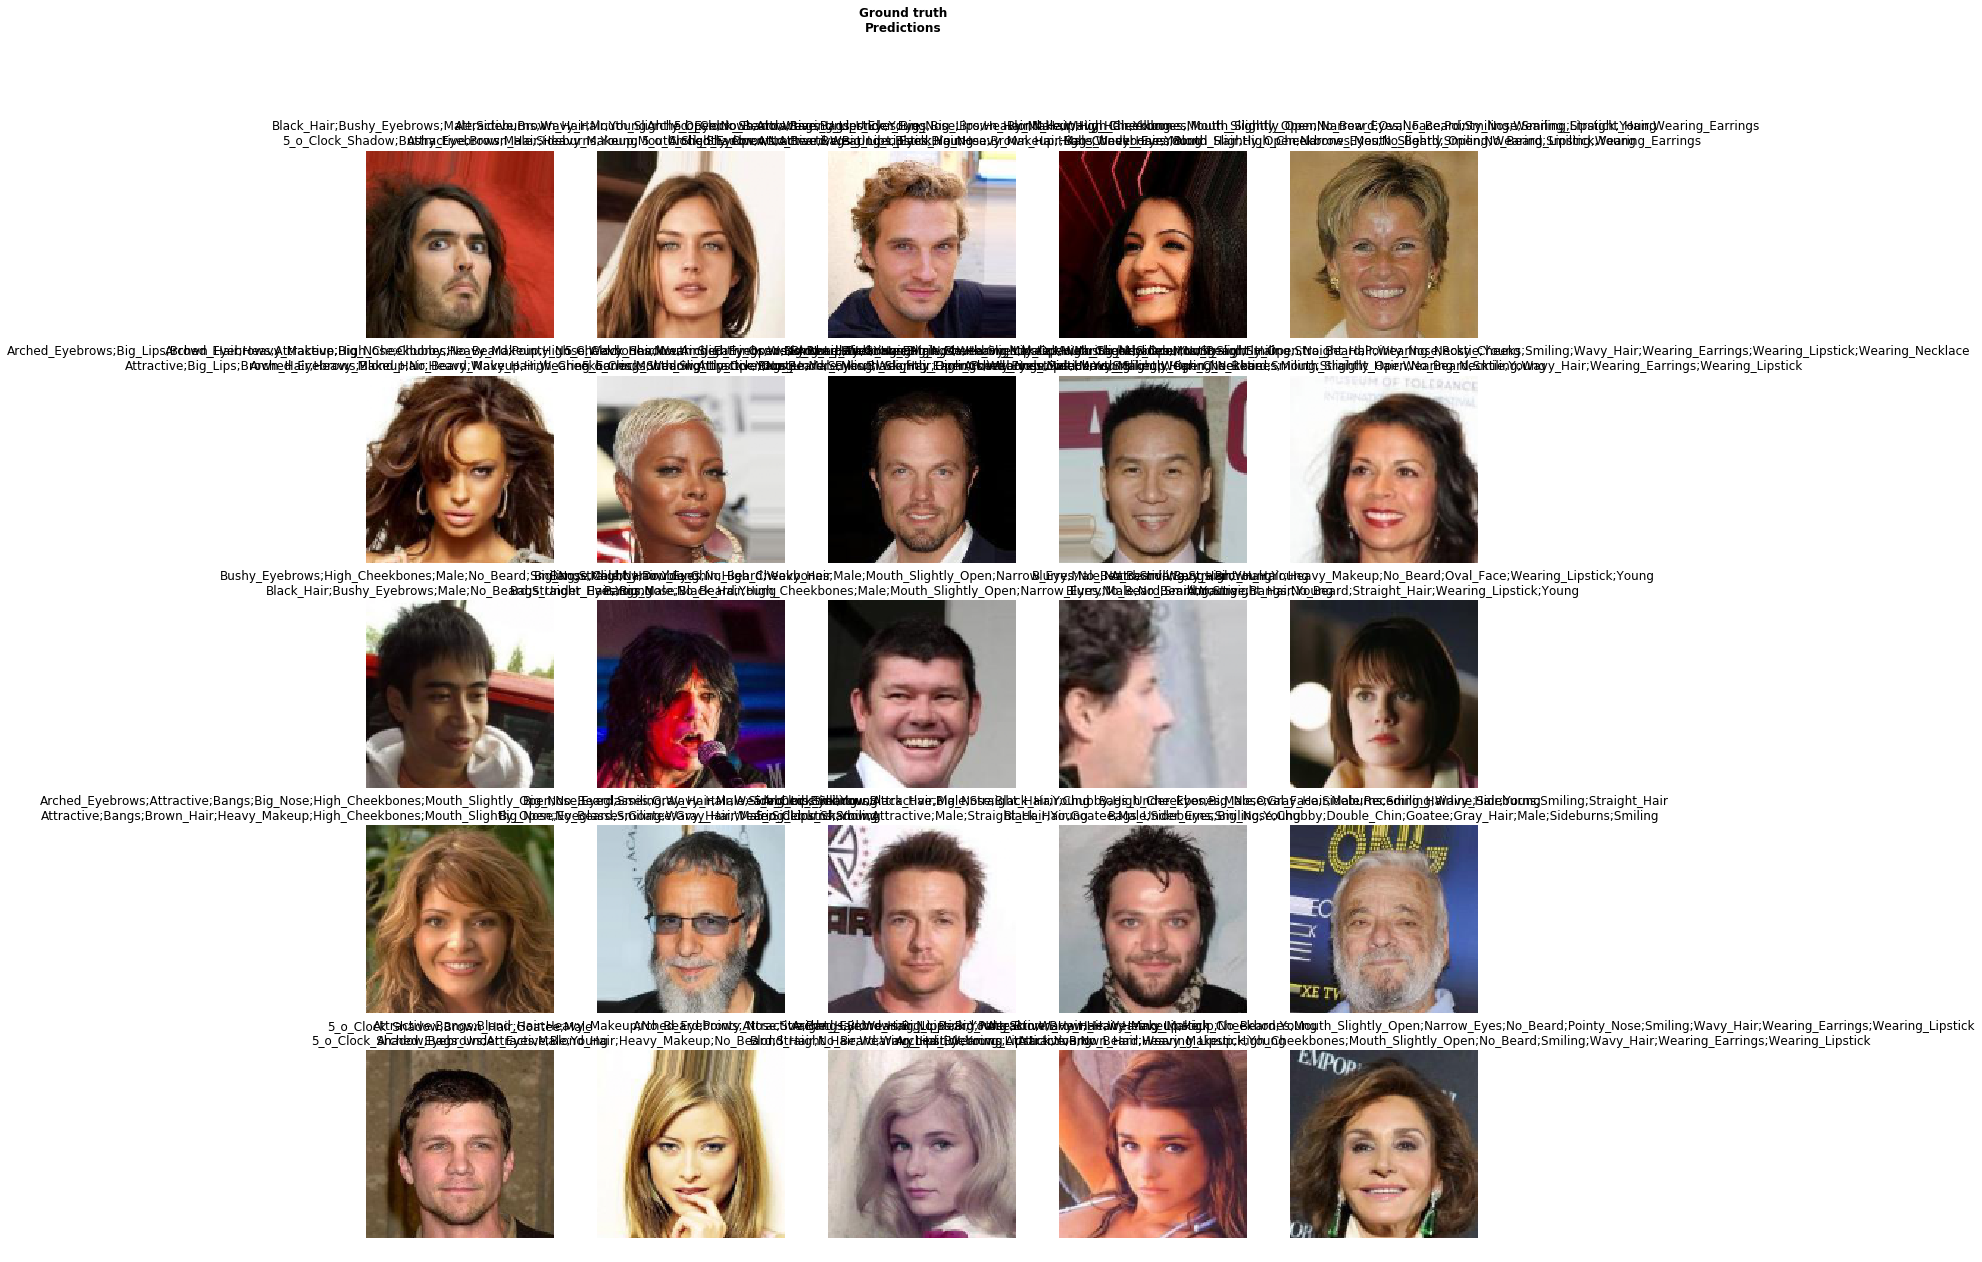

In [67]:
learn.show_results()

### Rename files

In [0]:
import os
path = '.'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(file, 'img' + str(index) + '.png')